In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [17]:
pool_size = 1000
pool_fraction = 0.7
train_fraction = 0.1
test_fraction = 0.2
total_size = int(pool_size / pool_fraction)


In [18]:
# Generate clustered dataset
clustered_data, clustered_labels = make_blobs(
    n_samples=total_size,
    centers=5,       # 5 clusters
    n_features=2,    # 2D points for visualization
    random_state=42
)

In [19]:
np.random.seed(42)
unclustered_data = np.random.uniform(low=-10, high=10, size=(total_size, 2))
unclustered_labels = np.random.randint(0, 5, total_size)  # Assign random labels for consistency


In [20]:
scaler = MinMaxScaler(feature_range=(-1, 1))
clustered_data = scaler.fit_transform(clustered_data)
unclustered_data = scaler.fit_transform(unclustered_data)


In [21]:
# Split data into train, pool, and test sets
def split_data(data, labels):
    # Split into training and remaining set
    train_data, remaining_data, train_labels, remaining_labels = train_test_split(
        data, labels, test_size=(1 - train_fraction), stratify=labels, random_state=42
    )
    # Further split remaining data into pool and test sets
    pool_data, test_data, pool_labels, test_labels = train_test_split(
        remaining_data, remaining_labels, test_size=(test_fraction / (test_fraction + pool_fraction)), stratify=remaining_labels, random_state=42
    )
    return train_data, pool_data, test_data, train_labels, pool_labels, test_labels


In [22]:
# Split clustered data
clustered_train, clustered_pool, clustered_test, clustered_train_labels, clustered_pool_labels, clustered_test_labels = split_data(clustered_data, clustered_labels)

# Split unclustered data
unclustered_train, unclustered_pool, unclustered_test, unclustered_train_labels, unclustered_pool_labels, unclustered_test_labels = split_data(unclustered_data, unclustered_labels)


In [23]:
print(f"Clustered pool size: {len(clustered_pool)}, Unclustered pool size: {len(unclustered_pool)}")


Clustered pool size: 1000, Unclustered pool size: 1000


In [24]:
clustered_pool

array([[-0.58160504, -0.83962212],
       [-0.54856018, -0.71763921],
       [ 0.85545514, -0.09553319],
       ...,
       [-0.79736162,  0.41510675],
       [-0.57270263, -0.71363672],
       [ 0.37993271,  0.24752378]])

In [25]:
unclustered_data

array([[-0.25064889,  0.90181187],
       [ 0.46477455,  0.19639702],
       [-0.68800717, -0.69056952],
       ...,
       [ 0.31394007, -0.52144829],
       [-0.61680723,  0.83674122],
       [-0.79651531,  0.01065272]])

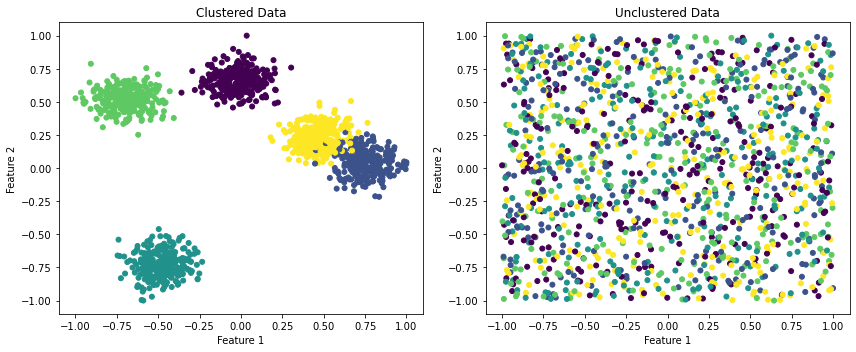

In [26]:
# Plotting the clustered and unclustered datasets
plt.figure(figsize=(12, 5))

# Plot clustered data
plt.subplot(1, 2, 1)
plt.scatter(clustered_data[:, 0], clustered_data[:, 1], c=clustered_labels, cmap='viridis', marker='o', s=25)
plt.title("Clustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot unclustered data
plt.subplot(1, 2, 2)
plt.scatter(unclustered_data[:, 0], unclustered_data[:, 1], c=unclustered_labels, cmap='viridis', marker='o', s=25)
plt.title("Unclustered Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

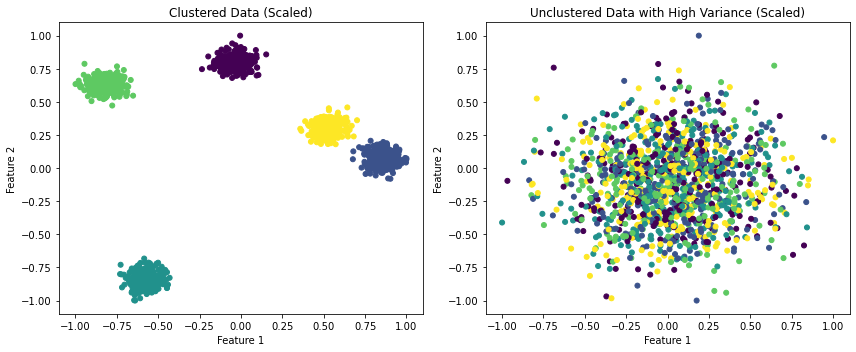

In [27]:
# Generate clustered dataset with distinct centers and lower variance
clustered_data2, clustered_labels2 = make_blobs(
    n_samples=total_size,
    centers=5,       # 5 clusters
    n_features=2,    # 2D points for visualization
    cluster_std=0.5, # Smaller spread for tighter clusters
    random_state=42
)

# Generate unclustered dataset with close centers and high variance
unclustered_data2, unclustered_labels2 = make_blobs(
    n_samples=total_size,
    centers=[[0.1, 0.1], [0.2, 0.2], [-0.1, -0.1], [-0.2, -0.2], [0, 0]],  # Close centers
    n_features=2,
    cluster_std=2.5,  # Higher spread for "unstructured" clusters
    random_state=42
)

# Scale the data between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
clustered_data2 = scaler.fit_transform(clustered_data2)
unclustered_data2 = scaler.fit_transform(unclustered_data2)

# Plotting the scaled clustered and unclustered datasets
plt.figure(figsize=(12, 5))

# Plot clustered data
plt.subplot(1, 2, 1)
plt.scatter(clustered_data2[:, 0], clustered_data2[:, 1], c=clustered_labels2, cmap='viridis', marker='o', s=25)
plt.title("Clustered Data (Scaled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot unclustered data with high variance
plt.subplot(1, 2, 2)
plt.scatter(unclustered_data2[:, 0], unclustered_data2[:, 1], c=unclustered_labels, cmap='viridis', marker='o', s=25)
plt.title("Unclustered Data with High Variance (Scaled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

In [28]:
# Split data into train, pool, and test sets
def split_data(data, labels):
    # Split into training and remaining set
    train_data, remaining_data, train_labels, remaining_labels = train_test_split(
        data, labels, test_size=(1 - train_fraction), stratify=labels, random_state=42
    )
    # Further split remaining data into pool and test sets
    pool_data, test_data, pool_labels, test_labels = train_test_split(
        remaining_data, remaining_labels, test_size=(test_fraction / (test_fraction + pool_fraction)), stratify=remaining_labels, random_state=42
    )
    return train_data, pool_data, test_data, train_labels, pool_labels, test_labels


In [29]:
# Split clustered data
clustered_train2, clustered_pool2, clustered_test2, clustered_train_labels2, clustered_pool_labels2, clustered_test_labels2 = split_data(clustered_data2, clustered_labels2)

# Split unclustered data
unclustered_train2, unclustered_pool2, unclustered_test2, unclustered_train_labels2, unclustered_pool_labels2, unclustered_test_labels2 = split_data(unclustered_data2, unclustered_labels2)


In [31]:
final_clustered = {
    "data": {
        "train": {"data": clustered_train2.tolist(), "labels": clustered_train_labels2.tolist()},
        "pool": {"data": clustered_pool2.tolist(), "labels": clustered_pool_labels2.tolist()},
        "test": {"data": clustered_test2.tolist(), "labels": clustered_test_labels2.tolist()}
    },
    "num_labels": 5,
    "dim": 2
}

# Create the final structure for unclustered data
final_unclustered = {
    "data": {
        "train": {"data": unclustered_train2.tolist(), "labels": unclustered_train_labels2.tolist()},
        "pool": {"data": unclustered_pool2.tolist(), "labels": unclustered_pool_labels2.tolist()},
        "test": {"data": unclustered_test2.tolist(), "labels": unclustered_test_labels2.tolist()}
    },
    "num_labels": 5,
    "dim": 2
}


print("Clustered Data Structure:\n", final_clustered)
print("\nUnclustered Data Structure:\n", final_unclustered)

Clustered Data Structure:
 {'data': {'train': {'data': [[-0.5404890779181937, -0.8091166286293695], [-0.5966297581335217, -0.7920228059861946], [0.8953407385149116, 0.09554029843299328], [0.8783224555333803, 0.05377845571047582], [0.8144479422901902, 0.07989873086554233], [-0.6900809491409899, 0.554108334840273], [0.563492074584738, 0.337738979680264], [0.4999604595847673, 0.33477312272926885], [-0.6580562602771515, -0.9321736701789435], [-0.01567556230498135, 0.8974889329402268], [-0.8814999643140369, 0.6035009050638379], [-0.6646315460548099, -0.8389793016877624], [0.8995322944881857, 0.043068761613260176], [-0.10938050738495764, 0.6944229956784048], [-0.5208873718447237, -0.878729314611243], [0.4915819171888609, 0.2889929026555428], [0.4512283896564019, 0.24923107779590215], [0.8585664197653022, 0.003616107793866258], [-0.11267963963769079, 0.7317011080691239], [0.8389961333729786, 0.09457351047879389], [-0.5347587683312328, -0.7909362053055125], [-0.5266873892371263, -0.78485608878

In [32]:
import pickle

# Save final_clustered to a pickle file
with open("clustered_data.pkl", "wb") as f:
    pickle.dump(final_clustered, f)



In [33]:
with open("unclustered_data.pkl", "wb") as f:
    pickle.dump(final_unclustered, f)